In [15]:
%cd /storage/lab/solar-energy-prediction/

/storage/lab/solar-energy-prediction


In [16]:
import pandas as pd
import os
import numpy as np

datasets_path = "data/energy"
csv_files: list[str] = []
for root, dirs, files in os.walk(datasets_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

data = dict()
for file in csv_files:
    data[file.split('/')[-1].split('.')[0]] = pd.read_csv(file, index_col=0)


# Check that the timestamps are the same for all recordings
key = 'start'
t_diff = np.zeros((len(data), len(data)))
for i, (production_type_A,data_A) in enumerate(data.items()):
    for j, (production_type_B,data_B) in enumerate(data.items()):
        try :
            d = data_A[key] - data_B[key]
            total_diff = np.sum(d)
            average_diff = total_diff/len(d)
            t_diff[i, j] = total_diff
            if total_diff != 0:
                print(f"{production_type_A} vs {production_type_B} average diff : {average_diff}")
        except KeyError as e:
            print(production_type_A)

print(t_diff)

BIOMASS vs FOSSIL_GAS average diff : -3428.3170002400857
BIOMASS vs FOSSIL_HARD_COAL average diff : 2237.045767039874
BIOMASS vs FOSSIL_OIL average diff : 2237.045767039874
BIOMASS vs HYDRO_PUMPED_STORAGE average diff : 2237.045767039874
BIOMASS vs HYDRO_RUN_OF_RIVER_AND_POUNDAGE average diff : -126597.78684767663
BIOMASS vs HYDRO_WATER_RESERVOIR average diff : -21354.53652574372
BIOMASS vs NUCLEAR average diff : 1118.6258675629665
BIOMASS vs TOTAL average diff : 6068.297579817995
BIOMASS vs WASTE average diff : 2237.045767039874
BIOMASS vs WIND_OFFSHORE average diff : -35399032.34170723
FOSSIL_GAS vs BIOMASS average diff : 3428.3170002400857
FOSSIL_GAS vs FOSSIL_HARD_COAL average diff : 5664.741701041053
FOSSIL_GAS vs FOSSIL_OIL average diff : 5664.741701041053
FOSSIL_GAS vs HYDRO_PUMPED_STORAGE average diff : 5664.741701041053
FOSSIL_GAS vs HYDRO_RUN_OF_RIVER_AND_POUNDAGE average diff : -123203.23045357314
FOSSIL_GAS vs HYDRO_WATER_RESERVOIR average diff : -17931.165146025232
FOSSIL_

In [17]:
# Fuse data into 1 dataframe
fused_dataframe = pd.DataFrame({
    **{'Time': data['SOLAR']['start']},
    **{k: v['values'] for k, v in data.items()}
})
fused_dataframe

,Time,BIOMASS,FOSSIL_GAS,FOSSIL_HARD_COAL,FOSSIL_OIL,HYDRO_PUMPED_STORAGE,HYDRO_RUN_OF_RIVER_AND_POUNDAGE,HYDRO_WATER_RESERVOIR,NUCLEAR,SOLAR,TOTAL,WASTE,WIND_OFFSHORE,WIND_ONSHORE
0,1.577833e+09,347.0,6483.0,44.0,195.0,253.0,6139.0,2637.0,49003.0,0.0,68679,217.0,-4.0,3361.0
1,1.577837e+09,348.0,5576.0,44.0,203.0,374.0,5920.0,2359.0,49462.0,0.0,67312,216.0,445.0,2810.0
2,1.577840e+09,347.0,4257.0,44.0,203.0,-95.0,5793.0,1765.0,49565.0,0.0,64750,216.0,423.0,2655.0
3,1.577844e+09,348.0,2874.0,44.0,201.0,-868.0,5559.0,1296.0,49580.0,0.0,61987,217.0,346.0,2736.0
4,1.577848e+09,348.0,2823.0,44.0,200.0,-2443.0,5400.0,960.0,49271.0,0.0,59451,217.0,354.0,2631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45818,NaN,NaN,NaN,0.0,616.0,2448.0,NaN,NaN,NaN,NaN,57348,323.0,NaN,NaN
45819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57824,NaN,NaN,NaN
45820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57544,NaN,NaN,NaN
45821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57494,NaN,NaN,NaN


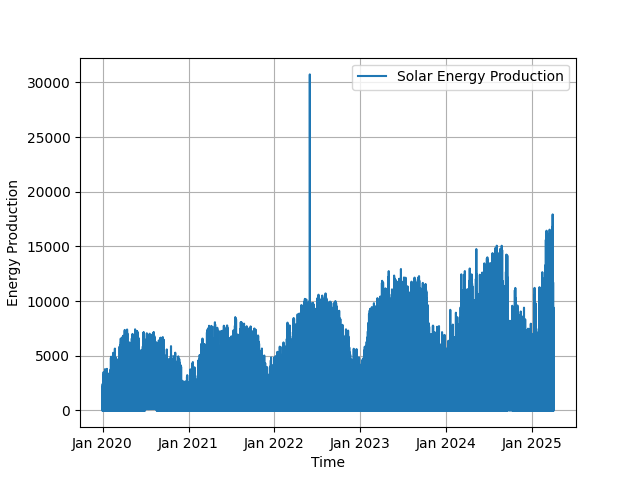

Biomass energy accounts for 0.7% of total energy production.
Fossil_gas energy accounts for 6.4% of total energy production.
Fossil_hard_coal energy accounts for 0.4% of total energy production.
Fossil_oil energy accounts for 0.3% of total energy production.
Hydro_pumped_storage energy accounts for 0.0% of total energy production.
Hydro_run_of_river_and_poundage energy accounts for 8.2% of total energy production.
Hydro_water_reservoir energy accounts for 3.1% of total energy production.
Nuclear energy accounts for 68.4% of total energy production.
Solar energy accounts for 3.7% of total energy production.
Waste energy accounts for 0.3% of total energy production.
Wind_offshore energy accounts for 0.2% of total energy production.
Wind_onshore energy accounts for 8.2% of total energy production.


In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib widget
# plt.figure(figsize=(10, 5))
plt.figure()
fused_dataframe['Time'] = pd.to_datetime(fused_dataframe['Time'], unit='s')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# for column in fused_dataframe.columns:
#     if column == 'Time':
#         continue
#     plt.plot(fused_dataframe['Time'], fused_dataframe[column], label=column)
plt.plot(fused_dataframe['Time'], fused_dataframe['SOLAR'], label='Solar Energy Production')
plt.xlabel("Time")
plt.ylabel("Energy Production")
plt.legend()
plt.grid()
plt.show()

for column in fused_dataframe.columns:
    if column in ['Time', 'TOTAL']:
        continue
    contribution = np.sum(
        fused_dataframe[column]) / np.sum(fused_dataframe['TOTAL'])
    print(f"{column.capitalize()} energy accounts for {contribution*100:.1f}% of total energy production.")